In [35]:
import mysql.connector as sql
import pandas as pd

db_connection = sql.connect(host='192.168.1.24', database='Agile_Tracker', user='newuser', password='p@ssw0rd')
db_cursor = db_connection.cursor()
db_cursor.execute('show databases')

table_rows = db_cursor.fetchall()

dfGps = pd.read_sql('SELECT * FROM reading_gps', con=db_connection)

dfBattery = pd.read_sql('SELECT * FROM reading_battery', con=db_connection)

dfTemperature = pd.read_sql('SELECT * FROM reading_temperature', con=db_connection)

dfAltitude = pd.read_sql('SELECT * FROM reading_altitude', con=db_connection)



In [36]:
# each device has 3 sensors, temperature, gps and altitude 
# 6 devices, so 18 different ids

In [37]:
print(dfBattery)

        id          time_stamp  sensor_id  battery
0        1 2019-02-05 15:28:07         18    100.0
1        3 2019-02-06 12:22:07         18     99.0
2        4 2019-02-06 12:37:07         18     98.0
3        5 2019-02-06 12:52:07         18     97.0
4        6 2019-02-06 13:13:08         18     96.0
5        7 2019-02-06 13:33:08         18     95.0
6        8 2019-02-07 13:08:28         16    100.0
7        9 2019-02-07 13:08:29         16     14.0
8       10 2019-02-07 13:08:29         18     14.0
9       11 2019-02-07 13:08:32         16    100.0
10      12 2019-02-07 13:08:32         18    100.0
11      13 2019-02-07 13:08:32         14    100.0
12      14 2019-02-07 13:09:04         16    100.0
13      15 2019-02-07 13:09:04         18    100.0
14      16 2019-02-07 13:09:04         14    100.0
15      17 2019-02-07 13:09:04         17    100.0
16      18 2019-02-07 13:09:15         16    100.0
17      19 2019-02-07 13:09:15         18    100.0
18      20 2019-02-07 13:09:15 

In [38]:
print(dfGps)

      id          time_stamp  sensor_id   latitude  longitude
0      1 2019-02-01 12:29:01          1  43.650415 -79.376966
1      2 2019-02-05 14:26:01          6  43.650491 -79.374908
2      3 2019-02-05 14:40:58          6  43.650034 -79.375980
3     18 2019-02-05 16:09:14          6  43.651116 -79.375957
4     19 2019-02-06 09:46:33          6  43.650231 -79.376472
5     65 2019-02-07 14:31:34          6  43.650328 -79.375557
6     66 2019-02-07 15:12:36          6  43.650640 -79.375011
7     67 2019-02-07 15:13:36          6  43.650635 -79.374745
8     68 2019-02-07 15:14:36          6  43.650635 -79.374745
9     69 2019-02-07 15:15:37          6  43.650635 -79.374745
10    70 2019-02-07 15:16:36          6  43.650635 -79.374745
11    71 2019-02-07 15:17:36          6  43.650635 -79.374745
12    72 2019-02-07 15:18:39          6  43.650635 -79.374745
13    73 2019-02-07 15:19:37          6  43.650635 -79.374745
14    74 2019-02-07 15:20:38          6  43.650635 -79.374745
15    75

In [39]:
print(dfTemperature)

        id          time_stamp  sensor_id  temperature
0        1 2019-02-01 15:08:26          7         25.8
1        2 2019-02-01 15:13:27          7         26.5
2        3 2019-02-01 15:13:27          7         26.5
3        4 2019-02-01 15:18:26          7         27.7
4        5 2019-02-01 15:18:26          7         27.7
5        6 2019-02-01 15:18:26          7         27.7
6        7 2019-02-05 10:30:23         12         31.5
7        8 2019-02-05 10:35:22         12         27.4
8        9 2019-02-05 10:35:22         12         27.4
9       10 2019-02-05 10:40:23         12         24.5
10      11 2019-02-05 10:40:23         12         24.5
11      12 2019-02-05 10:40:23         12         24.5
12      13 2019-02-05 10:59:38         12         31.9
13      14 2019-02-05 11:09:06         12         25.5
14      15 2019-02-05 11:16:39         12         17.7
15      16 2019-02-05 11:34:52         12         31.0
16      17 2019-02-05 11:35:53         12         33.0
17      18

In [40]:
dfTemperature['sensor_id'].unique()

array([ 7, 12, 18, 16, 14, 17, 15], dtype=int64)

In [41]:
print(dfAltitude)

Empty DataFrame
Columns: [id, time_stamp, sensor_id, altitude]
Index: []


In [42]:
join1 = pd.read_sql('select sensor.id,imei,sensor_name from sensor inner join device on sensor.device_id = device.sys_id inner join sensor_type on sensor.type_id = sensor_type.id where sensor_type.id=1', con=db_connection)


In [43]:
print(join1)

   id             imei sensor_name
0   1  015181000027145         gps
1   2  866425030465050         gps
2   3  866425030262341         gps
3   4  866425030473393         gps
4   5  866425030249843         gps
5   6  866425030236212         gps


In [44]:
join2 = pd.read_sql('select sensor.id,imei,sensor_name from sensor inner join device on sensor.device_id = device.sys_id inner join sensor_type on sensor.type_id = sensor_type.id where sensor_type.id=2', con=db_connection)

In [45]:
join3 = pd.read_sql('select sensor.id,imei,sensor_name from sensor inner join device on sensor.device_id = device.sys_id inner join sensor_type on sensor.type_id = sensor_type.id where sensor_type.id=3', con=db_connection)

In [46]:
print(join2)

   id             imei  sensor_name
0   7  015181000027145  temperature
1   8  866425030465050  temperature
2   9  866425030262341  temperature
3  10  866425030473393  temperature
4  11  866425030249843  temperature
5  12  866425030236212  temperature


In [47]:
print(join3)

   id             imei sensor_name
0  13  015181000027145     battery
1  14  866425030465050     battery
2  15  866425030262341     battery
3  16  866425030473393     battery
4  17  866425030249843     battery
5  18  866425030236212     battery


In [48]:
#cross reference and match up the sensor ids

#temperature data 

#15181000027145 list of temperatures
temp1 = dfTemperature.loc[dfTemperature["sensor_id"]== 7]
print(temp1)

   id          time_stamp  sensor_id  temperature
0   1 2019-02-01 15:08:26          7         25.8
1   2 2019-02-01 15:13:27          7         26.5
2   3 2019-02-01 15:13:27          7         26.5
3   4 2019-02-01 15:18:26          7         27.7
4   5 2019-02-01 15:18:26          7         27.7
5   6 2019-02-01 15:18:26          7         27.7


In [49]:
#866425030465050
temp2 = dfTemperature.loc[dfTemperature["sensor_id"]== 8]
print(temp2)

Empty DataFrame
Columns: [id, time_stamp, sensor_id, temperature]
Index: []


In [50]:
#866425030262341
temp3 = dfTemperature.loc[dfTemperature["sensor_id"]== 9]
print(temp3)

Empty DataFrame
Columns: [id, time_stamp, sensor_id, temperature]
Index: []


In [51]:
#866425030473393
temp4 = dfTemperature.loc[dfTemperature["sensor_id"]== 10]
print(temp4)

Empty DataFrame
Columns: [id, time_stamp, sensor_id, temperature]
Index: []


In [52]:
#866425030249843
temp5 = dfTemperature.loc[dfTemperature["sensor_id"]== 11]
print(temp5)

Empty DataFrame
Columns: [id, time_stamp, sensor_id, temperature]
Index: []


In [53]:
#866425030236212
temp6 = dfTemperature.loc[dfTemperature["sensor_id"]== 12]
print(temp6)

      id          time_stamp  sensor_id  temperature
6      7 2019-02-05 10:30:23         12         31.5
7      8 2019-02-05 10:35:22         12         27.4
8      9 2019-02-05 10:35:22         12         27.4
9     10 2019-02-05 10:40:23         12         24.5
10    11 2019-02-05 10:40:23         12         24.5
11    12 2019-02-05 10:40:23         12         24.5
12    13 2019-02-05 10:59:38         12         31.9
13    14 2019-02-05 11:09:06         12         25.5
14    15 2019-02-05 11:16:39         12         17.7
15    16 2019-02-05 11:34:52         12         31.0
16    17 2019-02-05 11:35:53         12         33.0
17    18 2019-02-05 11:36:53         12         33.0
18    19 2019-02-05 11:37:53         12         33.0
19    20 2019-02-05 11:38:53         12         33.0
20    21 2019-02-05 11:39:53         12         33.0
21    22 2019-02-05 11:41:17         12         34.4
22    23 2019-02-05 11:42:17         12         34.4
23    24 2019-02-05 11:43:17         12       

In [54]:
#performing visualization with 866425030236212
temperatureL6 = temp6['temperature'].tolist()

In [55]:
print(temperatureL6)

[31.5, 27.4, 27.4, 24.5, 24.5, 24.5, 31.9, 25.5, 17.7, 31.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.4, 34.4, 34.4, 34.4, 34.4, 34.4, 34.4, 34.4, 34.4, 34.4, 35.9, 35.9, 35.9, 35.9, 36.5, 36.5, 36.2, 35.0, 28.4, 28.4, 20.6, 20.6, 21.9, 21.9, 27.1, 27.1, 30.1, 32.1, 33.7, 34.8, 31.5, 29.4, 28.0, 26.3, 25.6, 24.5, 24.2, 24.0, 24.0, 24.0, 26.9, 28.9, 30.3, 29.8, 29.7, 33.9, 34.9, 35.7, 35.9, 35.7, 35.4, 35.1, 35.2, 34.0, 31.9, 31.7, 31.2, 31.3, 31.2, 31.1, 30.8, 30.9, 26.6, 21.6, 18.0, 18.0, 18.0, 15.4, 13.4, 11.8, 10.5, 9.7, 17.3, 22.8, 26.5, 28.1, 28.6, 30.1, 30.3, 30.5, 30.9, 31.2, 31.0, 31.0, 31.0, 31.1, 31.3, 31.2, 30.9, 31.1, 30.8, 30.6, 30.7, 30.6, 30.7, 30.6, 30.7]


In [56]:
from statistics import mean 

In [57]:
#find the average of all the temps

average = mean(temperatureL6)
print(average)

29.151785714285715


In [58]:
#find list of the deviation away from the mean for each value in the list 
l = len(temperatureL6)
dev6 = []
num = 0

for x in range(0, l):
    num = int(temperatureL6[x]) - int(average)
    dev6.append(num)
    

In [59]:
print(dev6)

[2, -2, -2, -5, -5, -5, 2, -4, -12, 2, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 6, -1, -1, -9, -9, -8, -8, -2, -2, 1, 3, 4, 5, 2, 0, -1, -3, -4, -5, -5, -5, -5, -5, -3, -1, 1, 0, 0, 4, 5, 6, 6, 6, 6, 6, 6, 5, 2, 2, 2, 2, 2, 2, 1, 1, -3, -8, -11, -11, -11, -14, -16, -18, -19, -20, -12, -7, -3, -1, -1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1]


In [60]:
import matplotlib as mpl

import numpy as np
import matplotlib.pyplot as plt

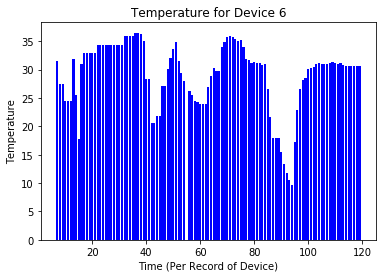

In [61]:
plt.title('Temperature for Device 6')
plt.xlabel('Time (Per Record of Device)')
plt.ylabel('Temperature')
plt.bar(temp6['id'], temp6['temperature'], color='blue')
plt.show()

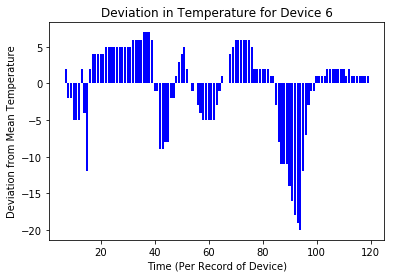

In [62]:
plt.title('Deviation in Temperature for Device 6')
plt.xlabel('Time (Per Record of Device)')
plt.ylabel('Deviation from Mean Temperature')
plt.bar(temp6['id'], dev6, color='blue')
plt.show()

In [63]:
#Hourly Average Temperature 
#https://ipython-books.github.io/63-creating-interactive-web-visualizations-with-bokeh-and-holoviews/


In [64]:
#Holloviews
#https://ipython-books.github.io/63-creating-interactive-web-visualizations-with-bokeh-and-holoviews/

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
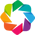

In [65]:
import holoviews as hv
hv.extension('bokeh')

In [66]:
data = np.random.rand(100, 100, 10)
ds = hv.Dataset((np.arange(10),
                 np.linspace(0., 1., 100),
                 np.linspace(0., 1., 100),
                 data),
                kdims=['time', 'y', 'x'],
                vdims=['z'])
ds

:Dataset   [time,y,x]   (z)

In [67]:
%opts Image(cmap='viridis')
ds.to(hv.Image, ['x', 'y']).hist()

:AdjointLayout
   :HoloMap   [time]
      :Image   [x,y]   (z)
   :HoloMap   [time]
      :Histogram   [z]   (z_frequency)